> In this project, I used different regression methods to predict suicide rate based on a number of features, and to infer what features are important. 
> The data preprocessing and database construction are in the other notebooks in this repository. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

#machine learning packages
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


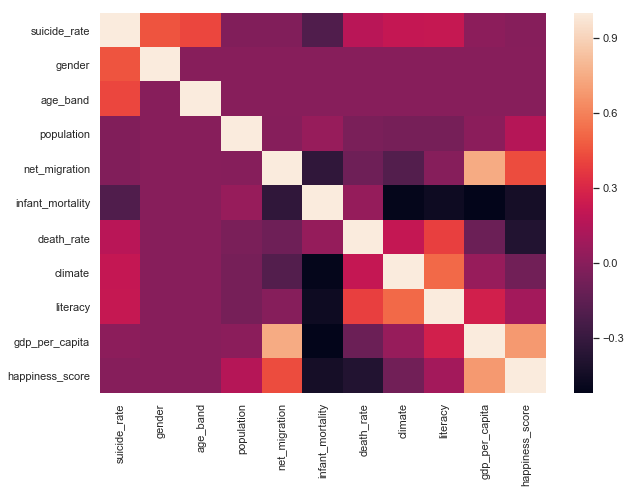

In [2]:
df = pd.read_csv('/Users/yanfeiwang/Desktop2/python/input_shee/suicide_df.csv')
# calculate the correlation matrix
corr = df.corr()
# plot the heatmap
sns.set(rc={'figure.figsize':(10,7)})
sns_plot1=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
sns_plot1.figure.savefig("correlation.png")

*Gender* and *age* are highly correlated to suicide rate.

In [3]:
df.head()

,suicide_rate,gender,age_band,population,net_migration,infant_mortality,death_rate,climate,literacy,gdp_per_capita,happiness_score
0,34.38,1,5,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
1,18.74,1,1,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
2,14.31,1,4,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
3,14.13,1,2,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574
4,12.25,1,3,39921833,0.61,15.18,7.55,3.0,97.1,14981.0,6.574


In [4]:
len(df)

636

In [5]:
y = df['suicide_rate']
X = df.drop('suicide_rate', axis =1)

In [6]:
#train-test-split
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
y_train = np.array(train['suicide_rate'])
X_train = train.drop('suicide_rate', axis =1)

test = df[~msk]
y_test = np.array(test['suicide_rate'])
X_test = test.drop('suicide_rate', axis =1)

In [7]:
y_lr = LinearRegression().fit(X_train, y_train).predict(X_test)
mean_absolute_error(y_lr, y_test)
print('Mean Absolute Error is %2f for linear regression model after Train-Test split.' %(mean_absolute_error(y_lr, y_test)))

Mean Absolute Error is 6.557694 for linear regression model after Train-Test split.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


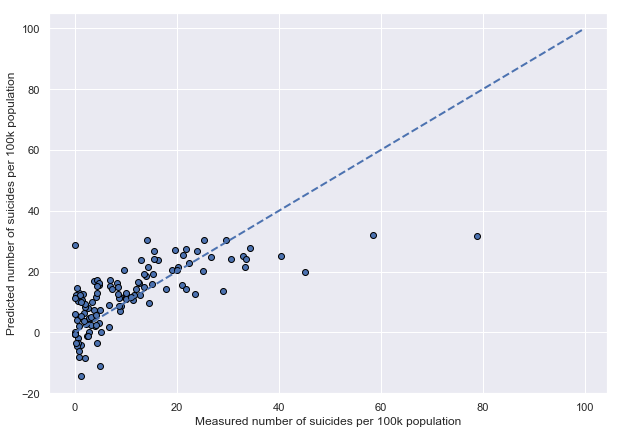

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_lr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=2)
ax.set_xlabel('Measured number of suicides per 100k population')
ax.set_ylabel('Predicted number of suicides per 100k population')
plt.show()

The linear regression model has a *high bias* for **high** values of suicide rates.

In [9]:
#cross validation
my_pipeline1 = make_pipeline(Imputer(), LinearRegression())
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(my_pipeline1, X, y, scoring='neg_mean_absolute_error', cv=len(df))
print('Mean Absolute Error is %2f for linear regression model after leave-one-out cross-validation.' %(-1 * scores1.mean()))


Mean Absolute Error is 7.046288 for linear regression model after leave-one-out cross-validation.


In [10]:
y_rf = RandomForestRegressor(random_state = 5).fit(X_train, y_train).predict(X_test)
print('Mean Absolute Error is %2f for RandomForest Regression model after Train-Test split.' %(mean_absolute_error(y_rf, y_test)))


Mean Absolute Error is 3.743636 for RandomForest Regression model after Train-Test split.


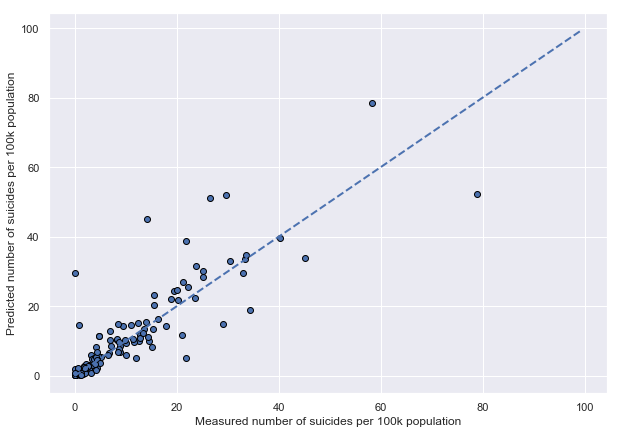

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_rf, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=2)
ax.set_xlabel('Measured number of suicides per 100k population')
ax.set_ylabel('Predicted number of suicides per 100k population')
plt.show()

In [12]:
#cross validation
my_pipeline2 = make_pipeline(Imputer(), RandomForestRegressor(random_state = 5))
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(my_pipeline2, X, y, scoring='neg_mean_absolute_error', cv=len(df))
print('Mean Absolute Error is %2f for random forest regression model after leave-one-out cross-validation.' %(-1 * scores2.mean()))

Mean Absolute Error is 3.604824 for random forest regression model after leave-one-out cross-validation.


In [13]:
y_svr = SVR(kernel='rbf', C=1e3, gamma=0.1).fit(X_train, y_train).predict(X_test)
print('Mean Absolute Error is %2f for support vector regression model after Train-Test split.' %(mean_absolute_error(y_svr, y_test)))


Mean Absolute Error is 34.162142 for support vector regression model after Train-Test split.


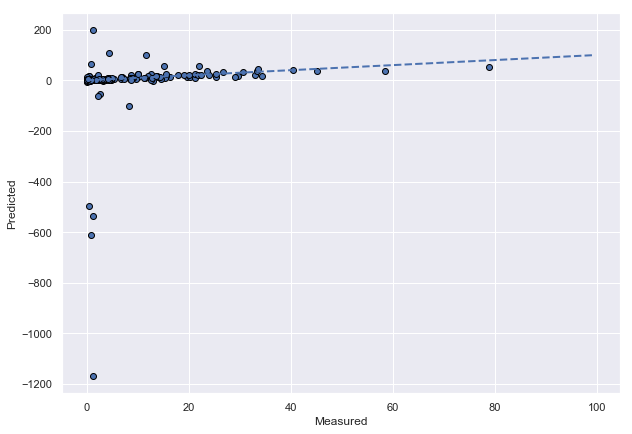

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_svr, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

The support vector model has a *high bias* and *high variance* for **low** values of suicide rates.

In [15]:
my_pipeline3 = make_pipeline(Imputer(), SVR())
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(my_pipeline3, X, y, scoring='neg_mean_absolute_error', cv=5)
print('Mean Absolute Error is %2f for support vector regression after cross-validation on 20 percent holdout set.' %(-1 * scores3.mean()))

Mean Absolute Error is 8.923134 for support vector regression after cross-validation on 20 percent holdout set.


In [16]:
#Least Absolute Shrinkage and Selection Operator(LASSO) for inference
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],y)
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(X,y_pred)
        plt.plot(X,y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y)**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [17]:
y = df['suicide_rate']
X = df.drop('suicide_rate', axis =1)
X.columns

Index(['gender', 'age_band', 'population', 'net_migration', 'infant_mortality',
       'death_rate', 'climate', 'literacy', 'gdp_per_capita',
       'happiness_score'],
      dtype='object')

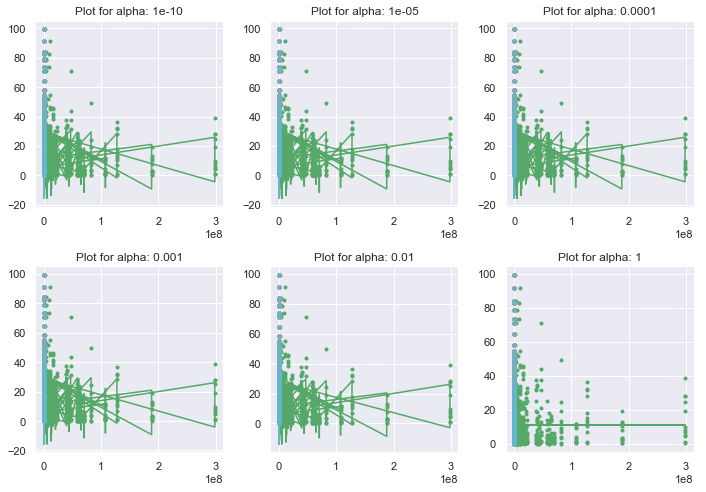

In [18]:
predictors = X.columns
#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['gender', 'age_band', 'population', 'net_migration', 'infant_mortality',
       'death_rate', 'climate', 'literacy', 'gdp_per_capita',
       'happiness_score']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(df, predictors, alpha_lasso[i], models_to_plot)

In [19]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,gender,age_band,population,net_migration,infant_mortality,death_rate,climate,literacy,gdp_per_capita,happiness_score
alpha_1e-15,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_1e-10,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_1e-08,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_1e-05,6.8e+04,-28,13,3.5,-1.9e-09,0.047,-0.18,0.65,1.2,0.16,-7.4e-05,0.75
alpha_0.0001,6.8e+04,-28,13,3.5,-1.9e-09,0.042,-0.18,0.65,1.2,0.16,-7.3e-05,0.73
alpha_0.001,6.8e+04,-27,13,3.5,-1.2e-09,0.0012,-0.19,0.64,1.1,0.16,-6.4e-05,0.57
alpha_0.01,6.9e+04,-22,12,3.3,-0,-0,-0.16,0.53,1.1,0.15,-3.3e-05,0
alpha_1,1.3e+05,11,0,0,-0,-0,-0,0,0,0,0,-0
alpha_5,1.3e+05,11,0,0,-0,-0,-0,0,0,0,0,-0
alpha_10,1.3e+05,11,0,0,-0,-0,-0,0,0,0,0,-0


> As expected, we see higer RSS for higher alphas, and at high alpha values, all features have coefficient 0. When the alpha value is 0.01, the coefficient for happiness_score is 0; and when alpha is smaller than 0.01, the higher happiness score led to higher suicide rate. It should be noted that such L1 regularized regression is unstable in a similar way as unregularized linear models are: the coefficients can vary significantly on small data changes when there are correlated features in the data. And in this dataset, the happiness score of a region/country could be correlated to several of the other features of the same region/country, although the correlation is hypothesized to be small since happiness score is generally a combination of individual-level data sets which reflects the life satisfaction level of the individuals. This inference does in part agree with what has been reported by psychologists as *'the happiness-suicide paradox'*(ref: Journal of Economic Behavior & Organization 80(3), December 2011). Using U.S. and international data, researchers found that the happiest places tend to have the highest suicide rates. The most compelling explanation of this paradox is, based on my reading and discussion with my psychologist friends, the “no-one-left-to-blame” theory, which is that if you have problems in life， such as a toxic environment or a corrupted government, you can always imagine that life will get a lot better; if you’re surrounded by happy people and bright environment but you’re unhappy then that could create a stronger contrast and maybe you start to blame yourself. 

Some features might be irrelevant and may drown out the relevant freatures' signal in the calculation, especially for distance-based modles. There are a couple ways to address this.
-  Reduce dimensionality by feature selection
-  Alternatively, the data may live on a manifold of lower dimension than the instance space, which allows other dimensionality-reduction techniques such as Principal Component Analysis.
We will try PCA here.


(array([114.,  53.,  42.,  41.,  33.,  22.,  32.,  24.,  17.,  22.,  16.,
         21.,  15.,  18.,  16.,   9.,   6.,   5.,   8.,  10.,   5.,  11.,
          5.,   2.,   9.,   8.,   1.,   4.,   4.,   5.,   4.,   3.,   7.,
          6.,   3.,   1.,   1.,   2.,   1.,   1.,   3.,   1.,   0.,   1.,
          1.,   2.,   2.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.    ,  0.9945,  1.989 ,  2.9835,  3.978 ,  4.9725,  5.967 ,
         6.9615,  7.956 ,  8.9505,  9.945 , 10.9395, 11.934 , 12.9285,
        13.923 , 14.9175, 15.912 , 16.9065, 17.901 , 18.8955, 19.89  ,
        20.8845, 21.879 , 22.8735, 23.868 , 24.8625, 25.857 , 26.8515,
        27.846 , 28.8405, 29.835 ,

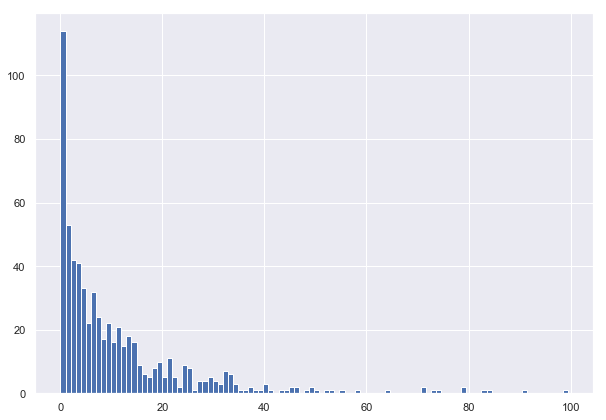

In [20]:
plt.hist (df['suicide_rate'], bins=100)

The distribution of suicide rate is extremely right-skewed.
thresholding and discretisation

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
#Standardize features by removing the mean and scaling to unit variance; otherwise large numbers such as population will overwhelm the variance
sc = StandardScaler()
X_std= sc.fit_transform(X)

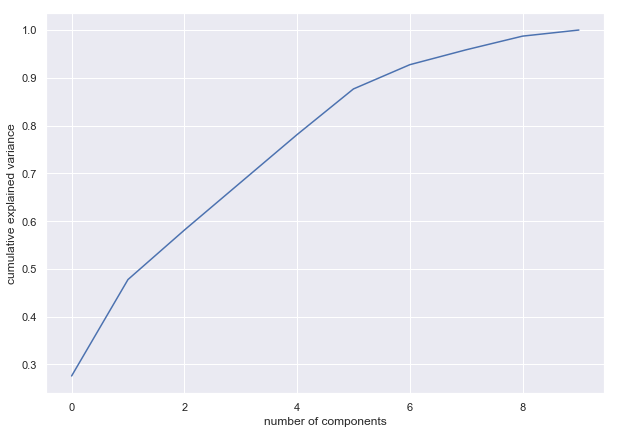

In [23]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can see that the first 5 components contain roughly 90% of the variance

In [24]:
pca = PCA(n_components=5)
pca.fit(X_std)
X_PCA = pca.transform(X_std)
print("original shape:   ", X.shape)
print("transformed shape:", X_PCA.shape)

original shape:    (636, 10)
transformed shape: (636, 5)


In [25]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.00000000e+00 -2.77555756e-17 -1.88557841e-02 -4.20811801e-01
   4.67509898e-01  9.31913920e-02 -1.48039007e-01 -2.51382189e-01
  -5.45357057e-01 -4.61290446e-01]
 [ 0.00000000e+00 -4.96564595e-16  1.38111511e-01  2.56357077e-01
   2.50422347e-01 -4.40860002e-01 -5.53296370e-01 -5.23205735e-01
   1.10879169e-01  2.56830803e-01]
 [ 0.00000000e+00 -1.53765889e-14  7.69876921e-01 -3.78749558e-01
  -1.29025875e-01 -3.25900488e-01  2.58711557e-01  2.72981934e-02
  -1.65025933e-01  2.14637076e-01]
 [ 0.00000000e+00 -1.00000000e+00 -4.42266161e-15  8.69474620e-15
   5.14982769e-15  1.26905118e-14 -6.85218260e-15  2.14466629e-15
   4.59928290e-15 -4.04951696e-15]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[2.76029188 2.02209018 1.03664629 1.0015748  1.0015748 ]


In [26]:
pca.explained_variance_ratio_

array([0.27559518, 0.20189108, 0.10350163, 0.1       , 0.1       ])

In [27]:
column_labels = list(df)[1:]

In [28]:
column_labels


['gender',
 'age_band',
 'population',
 'net_migration',
 'infant_mortality',
 'death_rate',
 'climate',
 'literacy',
 'gdp_per_capita',
 'happiness_score']

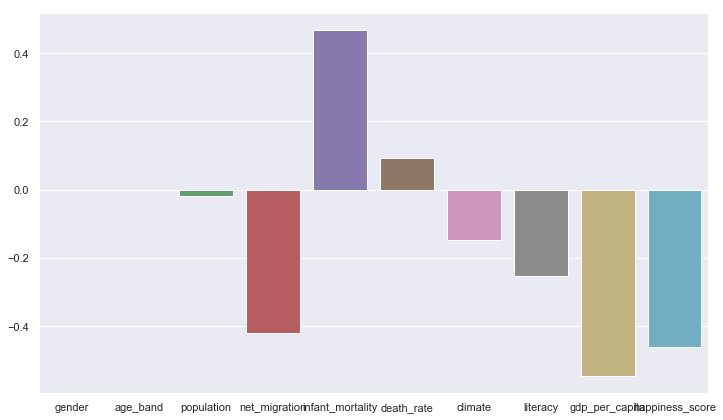

In [29]:
sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(column_labels,pca.components_[0,:])

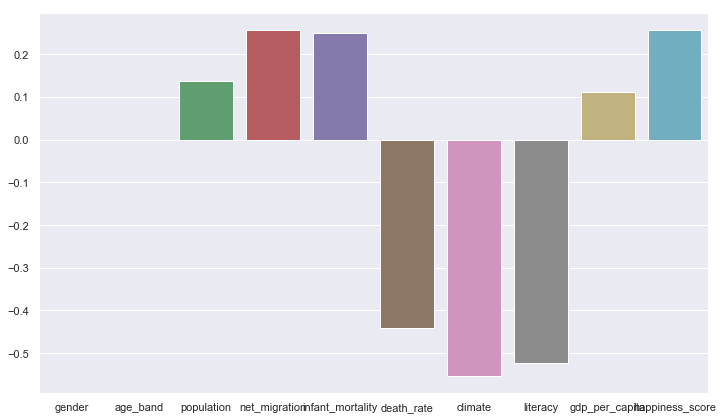

In [30]:
column_labels = list(df)[1:]

sns.set(rc={'figure.figsize':(12,7)})
sns.barplot(column_labels,pca.components_[1,:])

In [31]:
X_new = pca.inverse_transform(X_PCA)

In [32]:
#LinearRegression with cross validation after PCA
my_pipeline1 = make_pipeline(Imputer(), LinearRegression())
scores1_new = cross_val_score(my_pipeline1, X_new, y, scoring='neg_mean_absolute_error', cv=len(X_new))
print('Mean Absolute Error is %2f for linear regression model after PCA.' %(-1 * scores1_new.mean()))

Mean Absolute Error is 7.022747 for linear regression model after PCA.


In [33]:
my_pipeline1 = make_pipeline(Imputer(), LinearRegression())
scores1_PCA = cross_val_score(my_pipeline1, X_PCA, y, scoring='neg_mean_absolute_error', cv=len(X_PCA))
print('Mean Absolute Error is %2f for linear regression model after PCA.' %(-1 * scores1_PCA.mean()))

Mean Absolute Error is 7.020274 for linear regression model after PCA.


In [34]:
#Randomforest with cross validation after PCA
my_pipeline2 = make_pipeline(Imputer(), RandomForestRegressor(random_state = 5))
scores2_new = cross_val_score(my_pipeline2, X_new, y, scoring='neg_mean_absolute_error', cv=len(X_new))
print('Mean Absolute Error is %2f for random forest regression model after PCA.' %(-1 * scores2_new.mean()))

Mean Absolute Error is 3.608903 for random forest regression model after PCA.


Reducing dimensions of the instance space did not yield better prediction, perhaps because the number of features is not very large to begin with. 
This experiment could benefit from more data that contain information related to cultural background, labour market, etc.

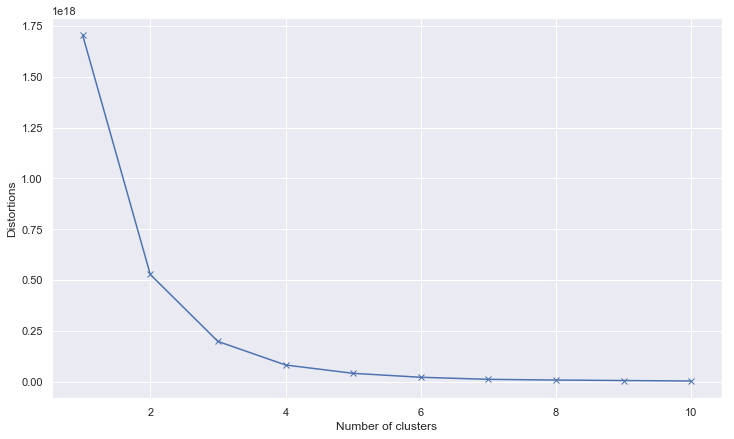

In [35]:
from sklearn.cluster import KMeans

#determining the number of clusters using the Elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker = 'x')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

The elbow method determined that 3 clusters is reasonable.

In [93]:
#kmeans fitting
km = KMeans(n_clusters=3)
km.fit(X)
print(km.labels_)

models_to_plot = {0:131, 1:132, 2:133}


[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [94]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([456,  24, 156]))

[12      20
13     6.9
14       5
15     4.2
16     3.9
17     1.7
18     1.4
19    0.97
20    0.92
21    0.73
22       0
23       0
24      30
25      27
26      24
27      20
28      17
29     9.2
30     7.2
31     6.8
32     6.3
33     5.9
34    0.56
35     0.4
36      74
37      32
38      24
39      15
40      13
41      12
      ... 
546    9.1
547    8.9
548    4.3
549    4.2
550   0.51
551   0.49
576    6.1
577      6
578    4.2
579    3.1
580    3.1
581    2.3
582    1.7
583    1.1
584   0.76
585   0.19
586      0
587      0
624     73
625     48
626     41
627     32
628     28
629     11
630     10
631    9.9
632    8.6
633    6.7
634    1.2
635   0.83
Name: suicide_rate, Length: 456, dtype: float64]
[60      19
61      13
62      12
63      11
64     7.9
65     3.2
66     3.2
67     2.7
68     2.3
69     2.3
70    0.49
71    0.36
612     39
613     28
614     28
615     25
616     19
617    9.8
618    8.2
619    6.7
620    5.2
621    4.6
622    1.2
623   0.78
Name: suicide_

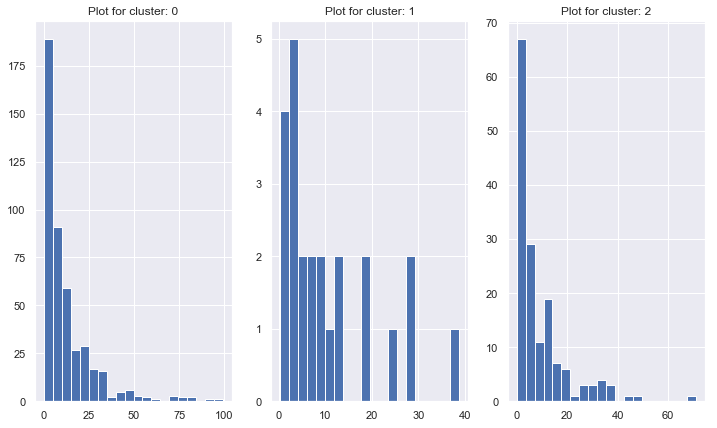

In [98]:
for i in range(3):
    a=[];
    a.append(df[km.labels_ == i]['suicide_rate'])
    print(a);
    plt.subplot(models_to_plot[i]);
    plt.title('Plot for cluster: %d'%i)
    plt.hist(a, bins = 20)
    

The distribution of y values for the left and right clusters are very similar to the whole dataset; the middle cluster has a different distribution, however there are only 24 instances.

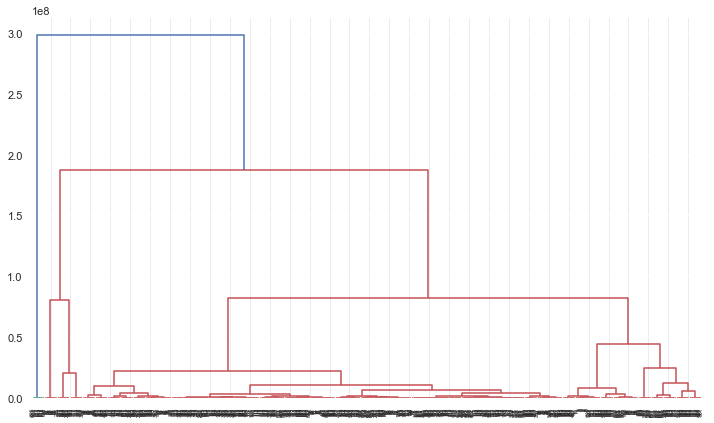

In [74]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

Z = hierarchy.linkage(pdist(X), 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [88]:
from scipy import cluster
Z = hierarchy.linkage(pdist(X), 'complete')
cuttree = cluster.hierarchy.cut_tree(Z, n_clusters=2)
np.unique(cuttree, return_counts=True)

(array([0, 1]), array([624,  12]))

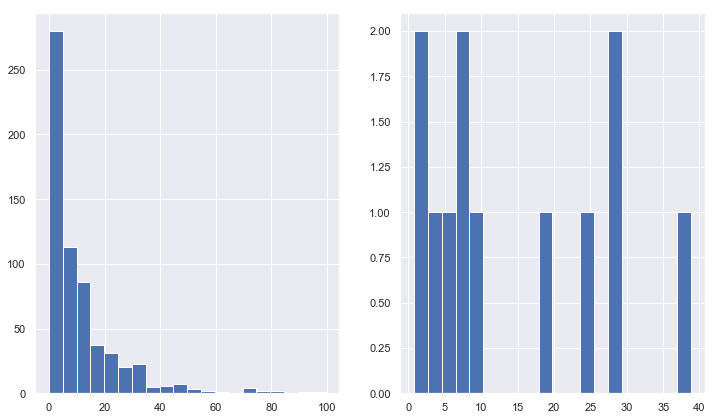

In [80]:
models_to_plot = {0:121, 1:122}
for i in range(2):
    a=[];
    a.append(df[cuttree == i]['suicide_rate'])
    plt.subplot(models_to_plot[i])
    plt.hist(a, bins = 20)

The outcome is similar to Kmeans method: a small subset of data were separated to a cluster with different distribution of suicide rate. 